### Project Overview
- Your goal for this project is to use the features provided for the homes in the data set and create a model that will aim to predict the appropriate selling price for a future home.
- There are many features for the homes privided so take the time to analyze the data to better understand the importance of each feature.
- when completed save your model for future use

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading in data
- will import housing data using pandas
- appears that we have no missing data so this makes our lives easier

In [5]:
df = pd.read_csv("Resources/kc_house_data.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007547      0.234292      3.409825   
std    4.141264e+04      0.539683      0.086549      0.766390      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21597.000000  21597.000000   21597.000000  21597.000000  21597.000000   
mean       7.657915   1788.596842     291.725008   1970.999676     84.464787   
std        1.173200    827.759761     442.667800     29.375234    401.821438   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

# Target
- Our target is the price of the house so we will look at that first
- appears that we have homes ranging from 0 to 8M with the average being around 500K to 



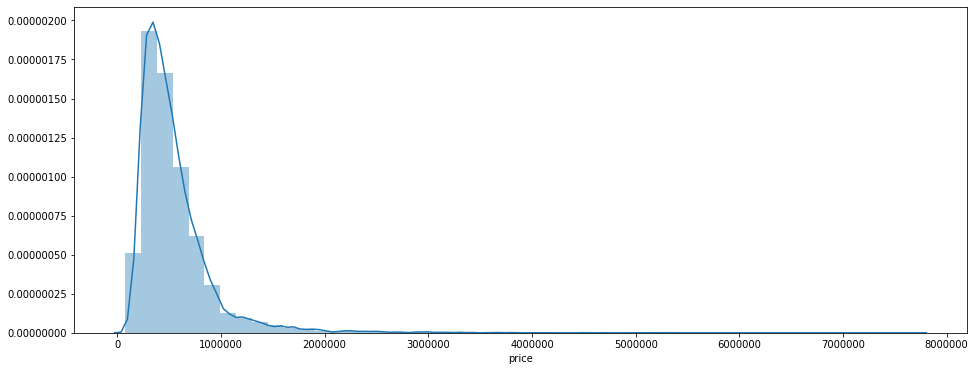

In [12]:
plt.figure(figsize=(16,6))
sns.distplot(df["price"])

### Coorelation Analysis
- We will check which features are coorelated to the price

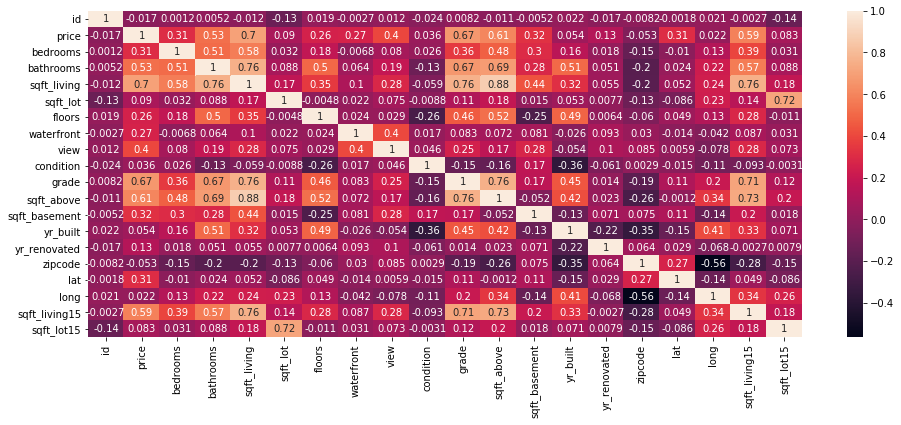

In [16]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True)

### Sqft _ living 
- has a 70% coorelation to the price of the the house

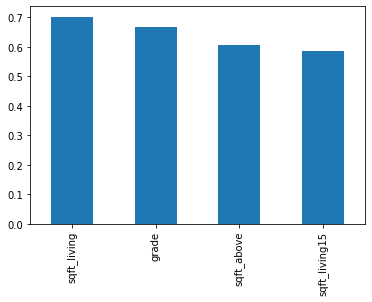

In [23]:
df.corrwith(df["price"]).sort_values(ascending = False).head()[1:].plot(kind = "bar")

### Coorelation to Price
- With a deepr dive we can see that there is a very strong coorelation to the sqft_living and the price of the house

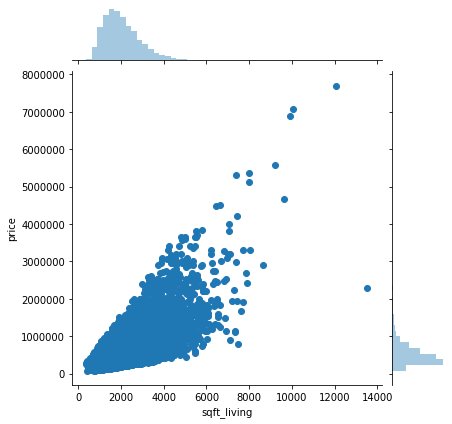

In [24]:
sns.jointplot(x=df["sqft_living"], y = df["price"], data = df)

### Looking at long and lat
- Lets see if we can get a good since of where the mose expensive homes are based on long and lat
- From the below diagram we ca nsee the highest prices homes are located on waterfronts
- also mainy at long = -122.3 , lat = 47.6

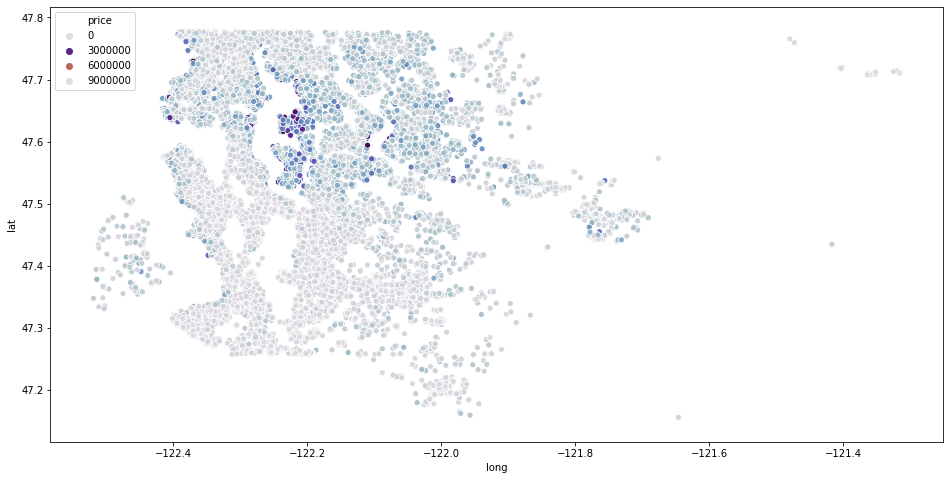

In [33]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = df["long"], y = df["lat"], data=df, hue="price", palette="twilight")

## Bedrooms vs Price
- Will analyze the price relative to the number of bedrooms

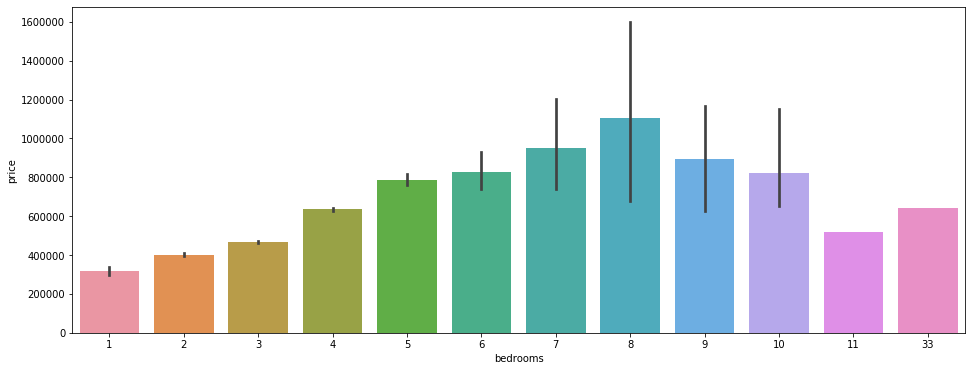

In [36]:
plt.figure(figsize=(16,6))
sns.barplot(x = df["bedrooms"], y = df["price"], data=df)

### Lets look at the count for each bead room type
- meaning how many house have a set amount of bedrooms
- there are not many homes that have 6 - 33 bedrooms

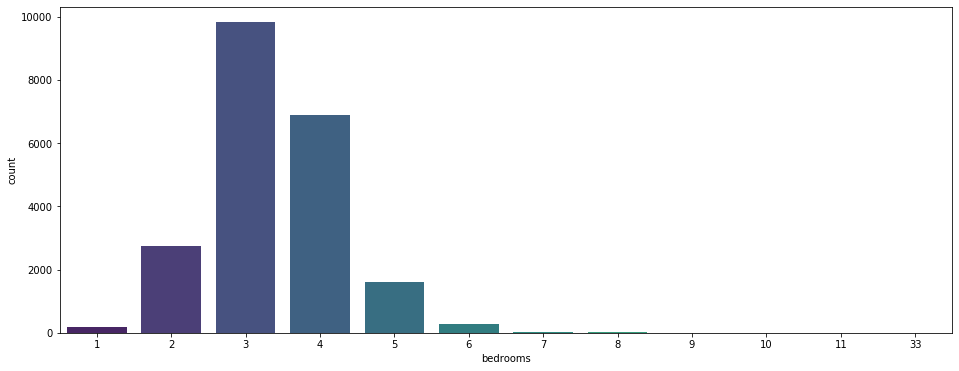

In [39]:
plt.figure(figsize= (16,6))
sns.countplot(df["bedrooms"], palette= "viridis")

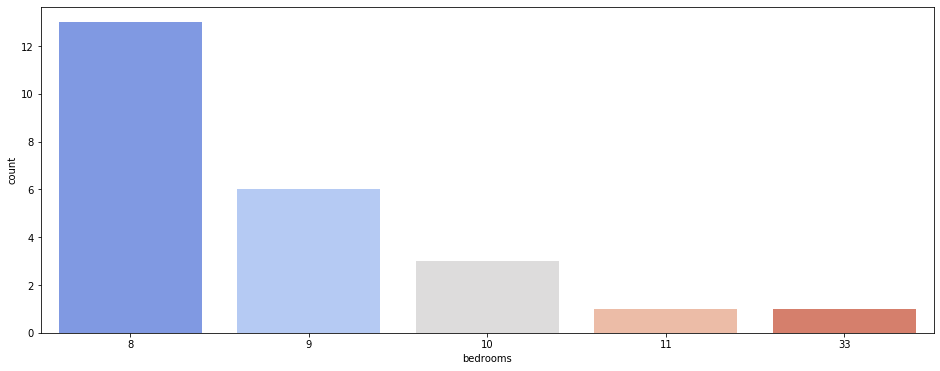

In [53]:
plt.figure(figsize=(16,6))
sns.countplot(df[df["bedrooms"] > 7]["bedrooms"], palette= "coolwarm")

### Bedroom analysis 
- From the recent diagrams we can see that number of bedrooms actually does not effect the ghouse price too much
- WE can assume the 33 bedroom house was a cheap sale maybe due to some damages to the property since it sold for 55K

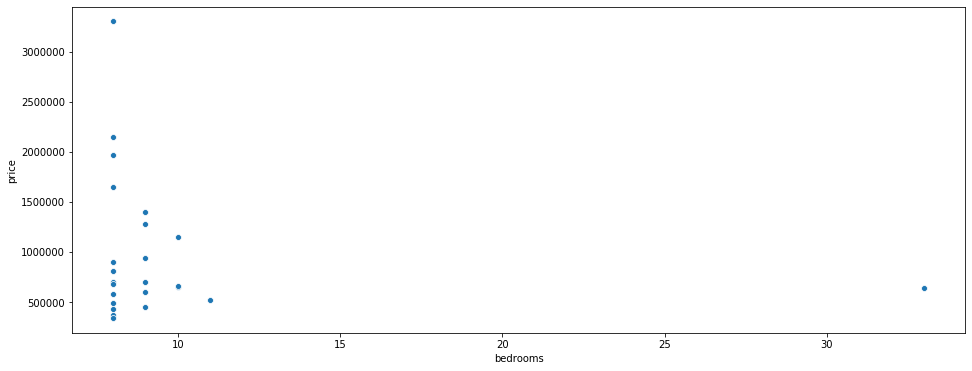

In [59]:
plt.figure(figsize=(16,6))
sns.scatterplot(x = df[df["bedrooms"] > 7]["bedrooms"], y=df[df["bedrooms"] > 7]["price"] )

### lets begin to drop data we will not need 
- lets drop the id column for the data frame  

In [61]:
df.drop("id", axis=1, inplace=True)

### Coverting dates to date time
- will use pandas todate time to do this

In [63]:
df["date"] = pd.to_datetime(df["date"])

## Extracting month and and year 
- will use list comprehension to achieve this

In [66]:
df["month"] = [x.month for x in df["date"]]

In [67]:
df["year"] = [x.year for x in df["date"]]

## We will drop date column
- Since we have the month and year we will not need the full date 

In [69]:
df.drop("date", axis=1, inplace=True)

In [88]:
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0         3       2.50         1530      1131     3.0   
21593  400000.0         4       2.50         2310      5813     2.0   
21594  402101.0         2       0.75         1020      1350     2.0   
21595  400000.0         3       2.50         1600      2388     2.0   
21596  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
0               0     0          3      7  ...              0      1955   
1               0     0          3      7  ...            400      1951   
2               0     0          3      6  ...              0      1933   
3               0     0          5      7  ...            910      1965   
4               0     0          3      8  ...              0      1987   
...           ...   ...        ...    ...  ...            ...       ...   
21592           0     0          3      8  ...              0      2009   
21593           0     0          3      8  ...              0      2014   
21594           0     0          3      7  ...              0      2009   
21595           0     0          3      8  ...              0      2004   
21596           0     0          3      7  ...              0      2008   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0                 0    98178  47.5112 -122.257           1340        5650   
1              1991    98125  47.7210 -122.319           1690        7639   
2                 0    98028  47.7379 -122.233           2720        8062   
3                 0    98136  47.5208 -122.393           1360        5000   
4                 0    98074  47.6168 -122.045           1800        7503   
...             ...      ...      ...      ...            ...         ...   
21592             0    98103  47.6993 -122.346           1530        1509   
21593             0    98146  47.5107 -122.362           1830        7200   
21594             0    98144  47.5944 -122.299           1020        2007   
21595             0    98027  47.5345 -122.069           1410        1287   
21596             0    98144  47.5941 -122.299           1020        1357   

       month  year  
0         10  2014  
1         12  2014  
2          2  2015  
3         12  2014  
4          2  2015  
...      ...   ...  
21592      5  2014  
21593      2  2015  
21594      6  2014  
21595      1  2015  
21596     10  2014  

[21597 rows x 21 columns]

## Dropping zipcode
- There are too many unique zipcodes to consider so lets drop them 
- even if we wanted to one hot encode, this could be possible but for now we will drop
- lets alos drop the year renovated sice there are many homes that have never been renovated

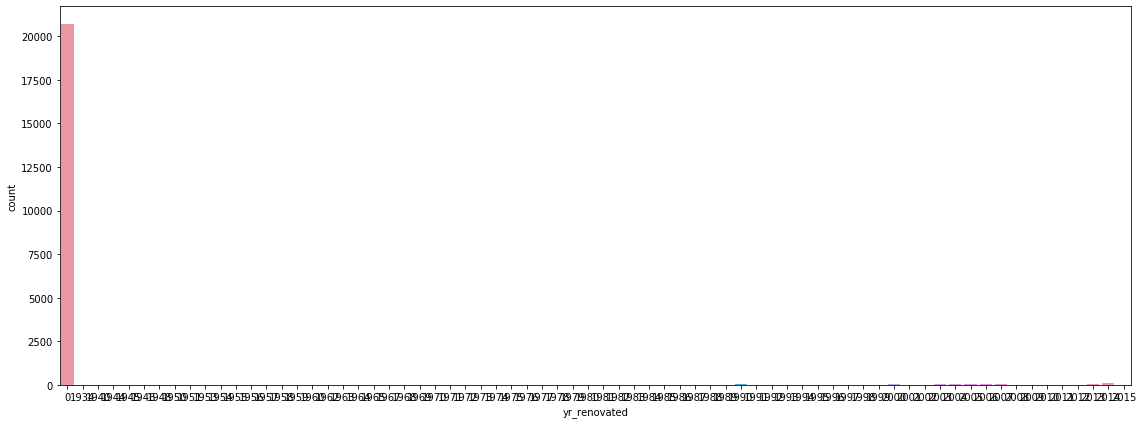

In [93]:
plt.figure(figsize=(16,6))
sns.countplot(df["yr_renovated"])
plt.tight_layout()

In [90]:
df["zipcode"].nunique()

70

In [94]:
df.drop(["zipcode", "yr_renovated"], axis=1, inplace=True)

In [95]:
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0         3       2.50         1530      1131     3.0   
21593  400000.0         4       2.50         2310      5813     2.0   
21594  402101.0         2       0.75         1020      1350     2.0   
21595  400000.0         3       2.50         1600      2388     2.0   
21596  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1               0     0          3      7        2170            400   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
...           ...   ...        ...    ...         ...            ...   
21592           0     0          3      8        1530              0   
21593           0     0          3      8        2310              0   
21594           0     0          3      7        1020              0   
21595           0     0          3      8        1600              0   
21596           0     0          3      7        1020              0   

       yr_built      lat     long  sqft_living15  sqft_lot15  month  year  
0          1955  47.5112 -122.257           1340        5650     10  2014  
1          1951  47.7210 -122.319           1690        7639     12  2014  
2          1933  47.7379 -122.233           2720        8062      2  2015  
3          1965  47.5208 -122.393           1360        5000     12  2014  
4          1987  47.6168 -122.045           1800        7503      2  2015  
...         ...      ...      ...            ...         ...    ...   ...  
21592      2009  47.6993 -122.346           1530        1509      5  2014  
21593      2014  47.5107 -122.362           1830        7200      2  2015  
21594      2009  47.5944 -122.299           1020        2007      6  2014  
21595      2004  47.5345 -122.069           1410        1287      1  2015  
21596      2008  47.5941 -122.299           1020        1357     10  2014  

[21597 rows x 19 columns]

## View and waterfront
- Let take a loook at the views and the waterfront columns before dropping them

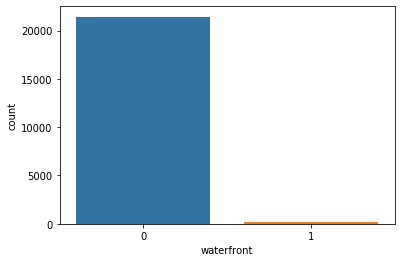

In [96]:
sns.countplot(df["waterfront"])

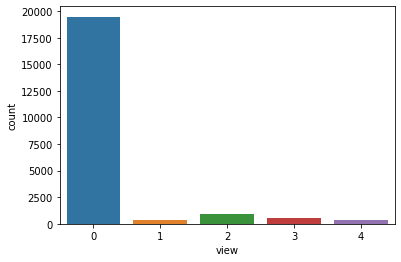

In [97]:
sns.countplot(df["view"])

## Water Front
- Though there are not many homes with a waterfront
- iT is still a factor in higher price homes so we will leave it
- looks to be the same for views so we will keep as well

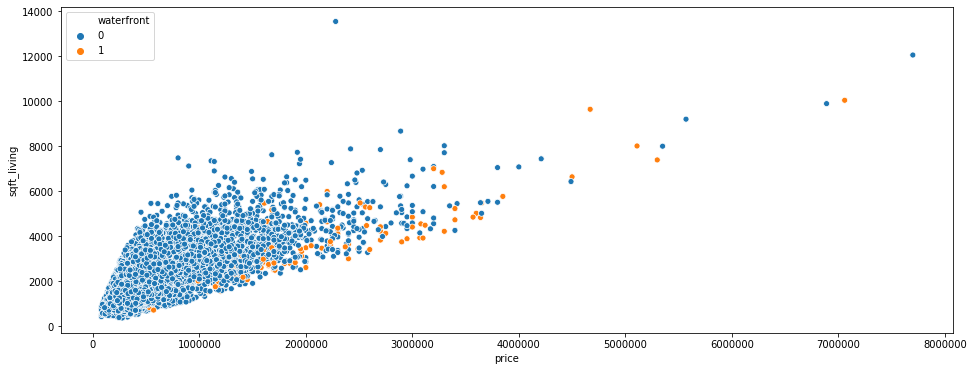

In [102]:
plt.figure(figsize=(16,6))
sns.scatterplot(x = df["price"], y = df["sqft_living"], data=df, hue=df["waterfront"])

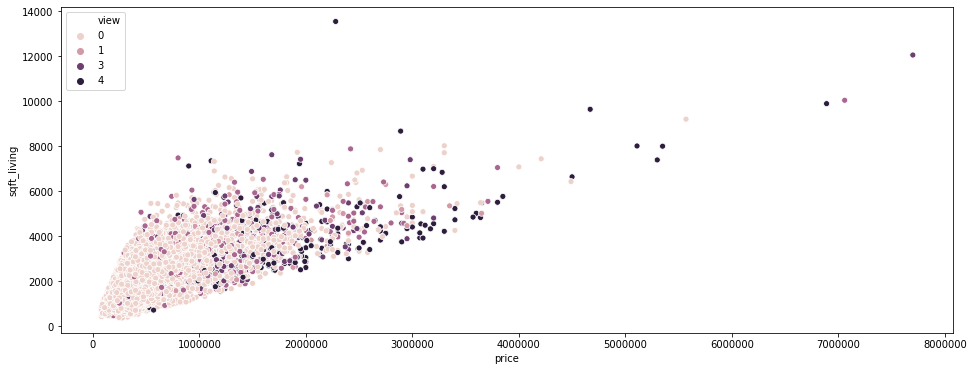

In [103]:
plt.figure(figsize=(16,6))
sns.scatterplot(x = df["price"], y = df["sqft_living"], data=df, hue=df["view"])

## Setting up the data 
- below we are checking if th data has any string values 
- our model wil not accept these so we either have to convert or drop
- appears we are good here so we will continue

In [106]:
df.select_dtypes(exclude=["float64", "int64"])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[21597 rows x 0 columns]

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [108]:
X = df.drop("price", axis=1).values
y = df["price"].values

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [111]:
len(X_train)

15117

In [112]:
len(X_test)

6480

### Lets scale the data 

In [113]:
scalar = MinMaxScaler()

In [114]:
X_train = scalar.fit_transform(X_train)

In [115]:
X_test = scalar.transform(X_test)

### Importing our deep learning libraries

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

### Early stoppping
- Used to prevent overfitting on the data

In [117]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=30)

In [119]:
X_train.shape

(15117, 18)

## Model Architecture

In [121]:
model = Sequential()
model.add(Dense(units = 48, activation = "relu"))
model.add(Dense(units = 38, activation = "relu"))
model.add(Dense(units = 28, activation = "relu"))
model.add(Dense(units = 28, activation = "relu"))
model.add(Dense(units = 10, activation = "relu"))
model.add(Dense(units = 10, activation = "relu"))
model.add(Dense(units = 1))
model.compile(loss = "mse", optimizer = "adam", metrics = ["accuracy"])

In [122]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=360, callbacks=[stop])

Train on 15117 samples, validate on 6480 samples
Epoch 1/360
15117/15117 [==============================] - 9s 611us/sample - loss: 264229660267.6023 - accuracy: 0.0000e+00 - val_loss: 95720101104.1975 - val_accuracy: 0.0000e+00
Epoch 2/360
15117/15117 [==============================] - 5s 311us/sample - loss: 89708966576.4922 - accuracy: 0.0000e+00 - val_loss: 82430658676.3062 - val_accuracy: 0.0000e+00
Epoch 3/360
15117/15117 [==============================] - 5s 300us/sample - loss: 72309966035.6822 - accuracy: 0.0000e+00 - val_loss: 63345700965.1358 - val_accuracy: 0.0000e+00
Epoch 4/360
15117/15117 [==============================] - 4s 293us/sample - loss: 54438808951.8799 - accuracy: 0.0000e+00 - val_loss: 51407352035.5556 - val_accuracy: 0.0000e+00
Epoch 5/360
15117/15117 [==============================] - 4s 286us/sample - loss: 47848713124.4855 - accuracy: 0.0000e+00 - val_loss: 48411947728.5926 - val_accuracy: 0.0000e+00
Epoch 6/360
15117/15117 [==============================

15117/15117 [==============================] - 5s 304us/sample - loss: 29736009063.0808 - accuracy: 0.0000e+00 - val_loss: 31832427426.4494 - val_accuracy: 0.0000e+00
Epoch 47/360
15117/15117 [==============================] - 4s 261us/sample - loss: 29662745944.4493 - accuracy: 0.0000e+00 - val_loss: 31121237191.7432 - val_accuracy: 0.0000e+00
Epoch 48/360
15117/15117 [==============================] - 4s 284us/sample - loss: 29586673544.2725 - accuracy: 0.0000e+00 - val_loss: 31704872588.3259 - val_accuracy: 0.0000e+00
Epoch 49/360
15117/15117 [==============================] - 4s 278us/sample - loss: 29416753032.6451 - accuracy: 0.0000e+00 - val_loss: 30979974975.8420 - val_accuracy: 0.0000e+00
Epoch 50/360
15117/15117 [==============================] - 4s 256us/sample - loss: 29346779259.9611 - accuracy: 0.0000e+00 - val_loss: 31051453220.0296 - val_accuracy: 0.0000e+00
Epoch 51/360
15117/15117 [==============================] - 4s 296us/sample - loss: 29405720424.5371 - accuracy: 

15117/15117 [==============================] - 4s 282us/sample - loss: 21191912286.9860 - accuracy: 0.0000e+00 - val_loss: 23848652186.8642 - val_accuracy: 0.0000e+00
Epoch 92/360
15117/15117 [==============================] - 4s 278us/sample - loss: 21156959587.9987 - accuracy: 0.0000e+00 - val_loss: 23556787792.9086 - val_accuracy: 0.0000e+00
Epoch 93/360
15117/15117 [==============================] - 4s 280us/sample - loss: 20778055946.2793 - accuracy: 0.0000e+00 - val_loss: 23563970371.6346 - val_accuracy: 0.0000e+00
Epoch 94/360
15117/15117 [==============================] - 4s 275us/sample - loss: 20785526420.7872 - accuracy: 0.0000e+00 - val_loss: 23340209395.3580 - val_accuracy: 0.0000e+00
Epoch 95/360
15117/15117 [==============================] - 4s 280us/sample - loss: 20654794635.5578 - accuracy: 0.0000e+00 - val_loss: 23296337032.5333 - val_accuracy: 0.0000e+00
Epoch 96/360
15117/15117 [==============================] - 4s 275us/sample - loss: 20485821876.4887 - accuracy: 

15117/15117 [==============================] - 4s 249us/sample - loss: 17643391667.6081 - accuracy: 0.0000e+00 - val_loss: 22391133715.5951 - val_accuracy: 0.0000e+00
Epoch 137/360
15117/15117 [==============================] - 5s 300us/sample - loss: 17625333493.7884 - accuracy: 0.0000e+00 - val_loss: 22137600993.6593 - val_accuracy: 0.0000e+00
Epoch 138/360
15117/15117 [==============================] - 4s 283us/sample - loss: 17599759688.8695 - accuracy: 0.0000e+00 - val_loss: 22181805258.2716 - val_accuracy: 0.0000e+00
Epoch 139/360
15117/15117 [==============================] - 4s 282us/sample - loss: 17554039297.0161 - accuracy: 0.0000e+00 - val_loss: 21706347816.4543 - val_accuracy: 0.0000e+00
Epoch 140/360
15117/15117 [==============================] - 4s 287us/sample - loss: 17480333767.8788 - accuracy: 0.0000e+00 - val_loss: 21408055809.2642 - val_accuracy: 0.0000e+00
Epoch 141/360
15117/15117 [==============================] - 4s 282us/sample - loss: 17369312493.6937 - accur

15117/15117 [==============================] - 4s 273us/sample - loss: 16038742166.9209 - accuracy: 0.0000e+00 - val_loss: 21290136554.5086 - val_accuracy: 0.0000e+00
Epoch 182/360
15117/15117 [==============================] - 4s 251us/sample - loss: 16113793357.1031 - accuracy: 0.0000e+00 - val_loss: 21289268561.5407 - val_accuracy: 0.0000e+00
Epoch 183/360
15117/15117 [==============================] - 4s 282us/sample - loss: 15747031949.3021 - accuracy: 0.0000e+00 - val_loss: 21486209352.0593 - val_accuracy: 0.0000e+00
Epoch 184/360
15117/15117 [==============================] - 4s 281us/sample - loss: 15791183192.3816 - accuracy: 0.0000e+00 - val_loss: 21108425850.6272 - val_accuracy: 0.0000e+00
Epoch 185/360
15117/15117 [==============================] - 4s 282us/sample - loss: 15763719632.4477 - accuracy: 0.0000e+00 - val_loss: 21577089797.6889 - val_accuracy: 0.0000e+00
Epoch 186/360
15117/15117 [==============================] - 4s 259us/sample - loss: 15655836316.8481 - accur

15117/15117 [==============================] - 4s 278us/sample - loss: 14636283342.3817 - accuracy: 0.0000e+00 - val_loss: 20683869387.5358 - val_accuracy: 0.0000e+00
Epoch 227/360
15117/15117 [==============================] - 4s 273us/sample - loss: 14766705151.2549 - accuracy: 0.0000e+00 - val_loss: 20020289782.5185 - val_accuracy: 0.0000e+00
Epoch 228/360
15117/15117 [==============================] - 4s 286us/sample - loss: 14681860800.3429 - accuracy: 0.0000e+00 - val_loss: 21603894378.1926 - val_accuracy: 0.0000e+00
Epoch 229/360
15117/15117 [==============================] - 4s 286us/sample - loss: 14931882085.6075 - accuracy: 0.0000e+00 - val_loss: 19874852029.6296 - val_accuracy: 0.0000e+00
Epoch 230/360
15117/15117 [==============================] - 4s 290us/sample - loss: 14611404999.3538 - accuracy: 0.0000e+00 - val_loss: 20194313561.1259 - val_accuracy: 0.0000e+00
Epoch 231/360
15117/15117 [==============================] - 4s 283us/sample - loss: 14611508780.8766 - accur

15117/15117 [==============================] - 4s 287us/sample - loss: 13747306887.7306 - accuracy: 0.0000e+00 - val_loss: 21118287999.6840 - val_accuracy: 0.0000e+00
Epoch 272/360
15117/15117 [==============================] - 4s 273us/sample - loss: 13423930106.4624 - accuracy: 0.0000e+00 - val_loss: 18743371985.8568 - val_accuracy: 0.0000e+00
Epoch 273/360
15117/15117 [==============================] - 4s 274us/sample - loss: 13448866933.0518 - accuracy: 0.0000e+00 - val_loss: 19810177796.4247 - val_accuracy: 0.0000e+00
Epoch 274/360
15117/15117 [==============================] - 4s 292us/sample - loss: 13606708724.3829 - accuracy: 0.0000e+00 - val_loss: 19852498772.0691 - val_accuracy: 0.0000e+00
Epoch 275/360
15117/15117 [==============================] - 4s 291us/sample - loss: 13543248660.8465 - accuracy: 0.0000e+00 - val_loss: 19573449315.8716 - val_accuracy: 0.0000e+00
Epoch 276/360
15117/15117 [==============================] - 4s 291us/sample - loss: 13411182417.7771 - accur

15117/15117 [==============================] - 4s 271us/sample - loss: 13073353280.5885 - accuracy: 0.0000e+00 - val_loss: 18290402118.1630 - val_accuracy: 0.0000e+00
Epoch 317/360
15117/15117 [==============================] - 4s 266us/sample - loss: 12518188757.4773 - accuracy: 0.0000e+00 - val_loss: 18220887364.8988 - val_accuracy: 0.0000e+00
Epoch 318/360
15117/15117 [==============================] - 4s 283us/sample - loss: 12499651302.2256 - accuracy: 0.0000e+00 - val_loss: 18513959633.8568 - val_accuracy: 0.0000e+00
Epoch 319/360
15117/15117 [==============================] - 4s 288us/sample - loss: 12522652654.3203 - accuracy: 0.0000e+00 - val_loss: 20593857790.1037 - val_accuracy: 0.0000e+00
Epoch 320/360
15117/15117 [==============================] - 4s 289us/sample - loss: 12415562722.9403 - accuracy: 0.0000e+00 - val_loss: 19652748364.4840 - val_accuracy: 0.0000e+00
Epoch 321/360
15117/15117 [==============================] - 4s 291us/sample - loss: 12526038419.9913 - accur

In [123]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              multiple                  912       
_________________________________________________________________
dense_8 (Dense)              multiple                  1862      
_________________________________________________________________
dense_9 (Dense)              multiple                  1092      
_________________________________________________________________
dense_10 (Dense)             multiple                  812       
_________________________________________________________________
dense_11 (Dense)             multiple                  290       
_________________________________________________________________
dense_12 (Dense)             multiple                  110       
_________________________________________________________________
dense_13 (Dense)             multiple                 

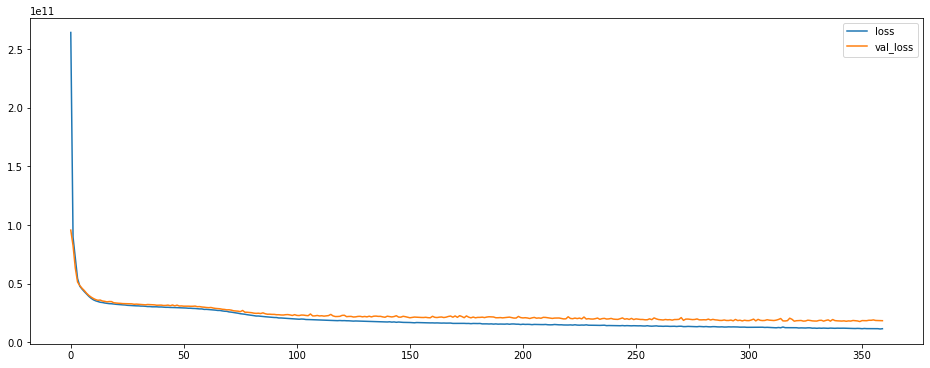

In [127]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot(figsize = (16,6))

In [129]:
predictions = model.predict(X_test)

## MSE
- The MSe values in the training is very high due to the ptices of the homes we are working with
- LEts take a look at the metrics from sklearn to use a root mse

In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [130]:
print(mean_squared_error(predictions, y_test))

18464849680.951626


In [131]:
print(mean_absolute_error(predictions, y_test))

74728.62431158371


## Root MSE
- Using this metric we can see that our modle is off about 135K dollars
- THis is not too bad considering we are working with homes in the millions
- Also we have a few homes that are Anomolies is very high prices.. We may want to eliminate these out of the data to get a more resonable error rate

In [132]:
print(np.sqrt(mean_squared_error(predictions,y_test)))

135885.4285085477


In [133]:
print(explained_variance_score(predictions, y_test))

0.8317004032792022


### look at our predicted values and the test values 
- appears that the model is predicting accurately between 0 and 3M. Get a bit off after that. Since we do not have many homes over 4M we may want to drop those homes from our data set

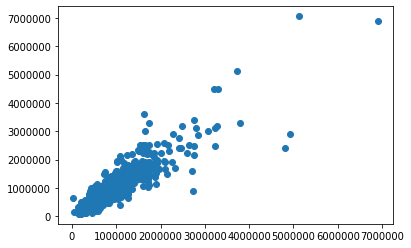

In [139]:
plt.scatter(predictions, y_test)

## Random Predictions
- First lets try rendom predicitons with our current model
- What we will do first is consider passing homes with out the price as if the model has not seen it before

In [148]:
from random import randint
random_index = randint(1, len(df))
random_home = df.drop("price", axis = 1).iloc[random_index]

In [149]:
random_home.shape

(18,)

## Reshaping
- WE need to reshape the random home to the dimansions our model was trained on

In [150]:
X_train.shape

(15117, 18)

In [151]:
random_home = scalar.transform(random_home.values.reshape(1,18))

In [152]:
random_home.shape

(1, 18)

In [153]:
model.predict(random_home)

array([[1217889.2]], dtype=float32)

### True Value
- WE can do this by looking at the true value at the index

In [154]:
df.iloc[random_index]["price"]

1350000.0

In [155]:
##model.save("Resources/house_pred_v1.h5")

In [158]:
##pd.DataFrame(model.history.history)[["loss","val_loss"]].to_csv("Resources/modelhistory.csv")